In [1]:
from data import historical_sales
from preprocessing import time_serie,preprocess_series
ruta=r'/home/sebastian/Documentos/programas/Forescast Work/sales_historical.csv'
df_SalesAndProduct=historical_sales(ruta)
lst_category=['Pliers']
filtros={
    'Country':'Mexico',
    'Category Group':lst_category
}
series_sales_dict,series_dict=time_serie(df_SalesAndProduct, filtros)
serie=series_dict['Pliers']


Se ejecutó correctamente: time_serie
-------------------------------------------------------------------------------



In [2]:
from models.model_sarimax import sarimax_model
predicciones=sarimax_model(serie)

Se ejecuto correctamente: generate_param_grid
-------------------------------------------------------------------------------

Number of models compared: 1311.


params grid:   0%|          | 0/1311 [00:00<?, ?it/s]

{'order': (2, 0, 4), 'seasonal_order': (2, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.4264482862158381
{'order': (2, 0, 4), 'seasonal_order': (2, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.4264482862158381
{'order': (1, 0, 1), 'seasonal_order': (1, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.3777054688312503
{'order': (1, 0, 1), 'seasonal_order': (1, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.3777054688312503
{'order': (2, 0, 2), 'seasonal_order': (1, 0, 0, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.37629123258994324
{'order': (3, 0, 1), 'seasonal_order': (1, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.35651355504645793
{'order': (3, 0, 1), 'seasonal_order': (1, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.35651355504645793
{'order': (1, 0, 3), 'seasonal_order': (1, 0, 0, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.3461330364595077
{'order': (1, 0, 1), 'seasonal_order': (1, 0, 3, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.3777054688312503
{'order': (3, 0, 4), 'seasonal_order': (1, 0, 0, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.3981179573098955


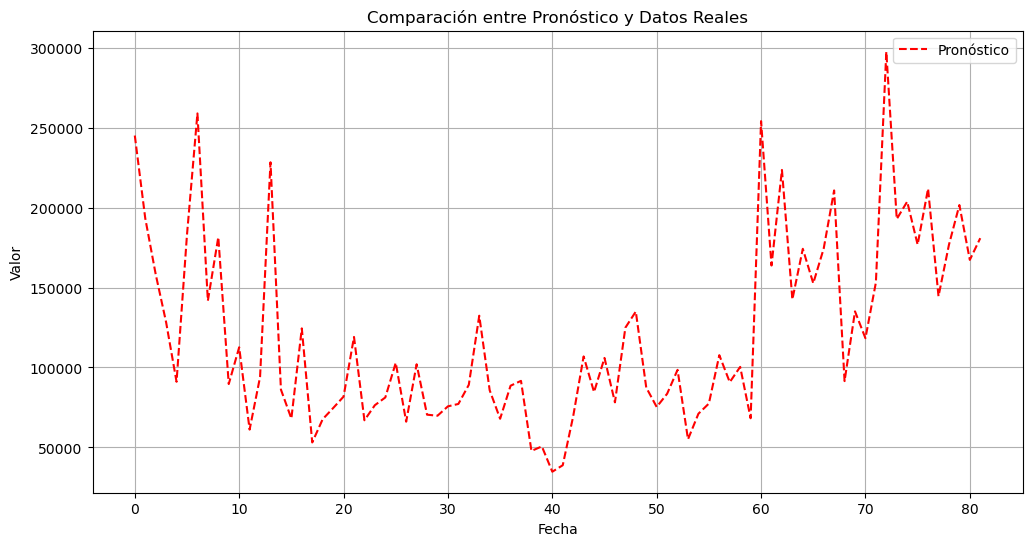

In [4]:
from packages import plt
 # Gráfico de comparación
plt.figure(figsize=(12, 6))
#plt.plot(serie, label='Datos de entrenamiento', color='blue')
plt.plot(predicciones['venta'], label='Pronóstico', color='red', linestyle='dashed')
plt.legend()
plt.title('Comparación entre Pronóstico y Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid()
plt.show()

In [9]:
type(predicciones)

pandas.core.frame.DataFrame

In [5]:
original_serie=series_sales_dict['Pliers']
original_serie.head(24)

Date
2019-01-01    245102.0
2019-02-01    193397.0
2019-03-01    158370.0
2019-04-01    128294.0
2019-05-01     91071.0
2019-06-01    183105.0
2019-07-01    258945.0
2019-08-01    141773.0
2019-09-01    181553.0
2019-10-01     89635.0
2019-11-01    112650.0
2019-12-01     61157.0
2020-01-01     94031.0
2020-02-01    228377.0
2020-03-01     86182.0
2020-04-01     68051.0
2020-05-01    124465.0
2020-06-01     53105.0
2020-07-01     67659.0
2020-08-01     74599.0
2020-09-01     81769.0
2020-10-01    119114.0
2020-11-01     66978.0
2020-12-01     76415.0
Freq: MS, Name: Total Sales, dtype: float64

In [6]:
predicciones.head()

,date,venta
0,2019-01-01,245102.0
1,2019-02-01,193397.0
2,2019-03-01,158370.0
3,2019-04-01,128294.0
4,2019-05-01,91071.0
